In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Importing all the neccessary libraries
#%matplotlib inline
import sqlite3, pandas as pd, numpy as np, nltk, string, matplotlib.pyplot as plt, seaborn as sns
import string, math, pickle
import warnings
warnings.filterwarnings("ignore")
from xgboost.sklearn import XGBModel, XGBRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import datasets

This notebook will provide an <font color='blue'>intuitive understanding</font> of how <font color='blue'>ensemble models</font> in Machine Learning work. We will take a look at some of the most common ensemble learning strategies which are deployed by thousands of Kagglers and dive deeper into making more accurate predictions using a particular ensemble strategy called <font color='blue'>Stacking Classifiers</font>.

<font color='blue'>Ensemble learning</font> is a strategy in which <font color='blue'>multiple models</font> are <font color='blue'>used in conjugation</font> to <font color='blue'>solve</font> a particular <font color='blue'>computational problem</font>. Ensemble methods strategically <font color='blue'>combine diverse</font> machine learning <font color='blue'>models</font> into one <font color='blue'>single predictive model</font>. In most of the cases, ensemble methods are primarily used to <font color='blue'>improve</font> the <font color='blue'>overall performance</font> of a model. Instead of using any one model to solve a problem, what ensemble models do is that it combine several different models to predict the results of a final model. More often than not, ensemble models are used to improve the performance accuracy of a model. The <font color='blue'>more different</font> these models are, the <font color='blue'>more powerful</font> will the final model be. In any machine learning model, the <font color='blue'>generalization error</font> is given by the <font color='blue'>sum of squares of bias + variance + irreducible error</font>. Irreducible errors are something that is beyond our control. We cannot reduce them. However <font color='blue'>using ensemble techniques</font> we can <font color='blue'>reduce</font> the <font color='blue'>bias and variance</font> of a <font color='blue'>model</font> to an extent, as well as <font color='blue'>improve</font> the <font color='blue'>prediction accuracy</font> of the final model. This <font color='blue'>reduces</font> the <font color='blue'>overall generalization error</font>. Using <font color='blue'>several models</font> to predict one outcome <font color='blue'>reduces</font> the <font color='blue'>likelihood</font> of a forlorn <font color='blue'>selection</font> of an <font color='blue'>inferior model</font>. The <font color='blue'>bias-variance trade-off</font> is the <font color='blue'>most important benchmark</font> that differentiates a robust model from an inferior one. In machine learning, the <font color='blue'>models</font> which have a <font color='blue'>high bias</font> tends to have a <font color='blue'>lower variance</font> and vice-versa.  

1. <font color='blue'>Bias</font> is an <font color='blue'>error</font> which arises due to <font color='blue'>incorrect assumptions</font> in the <font color='blue'>learning algorithm</font>, which is the backbone of any machine learning model. A <font color='blue'>high bias</font> can cause a machine learning algorithm to <font color='blue'>skip relevant information</font> and <font color='blue'>miss important correlations</font> between the independent variables and the class labels, thereby <font color='blue'>underfitting</font> the model.

2. The <font color='blue'>variance</font> in a model means <font color='blue'>how sensitive</font> the model is to <font color='blue'>small fluctuations</font> in the <font color='blue'>training data</font>. That is by how much the model changes with small changes in the training samples. <font color='blue'>High variance</font> in a machine learning algorithm will make the <font color='blue'>model prone</font> to <font color='blue'>random noise</font> present in the dataset thereby <font color='blue'>overfitting</font> the model.  

Think of ensemble learning analogous to the board of directors in a company, where the final decision is taken by the CEO. Instead of taking a decision all by himself, the CEO takes inputs from each of the board members before arriving at a final conclusion. The CEO, in this case, is the final model and the board members are the several models which provide different inputs to the CEO in order for him to arrive at a conclusion. This drastically reduces the chance of committing an error when the CEO makes his final decision. We use this approach regularly in our daily lives as well -  for example, we ask for the opinions of several different experts before arriving at a conclusion, we generally consult several doctors before agreeing to particular medical procedure, we read so many reviews written by different customers before setting our mind to buy a particular product. In each of the above scenarios what we are actually trying to achieve is to minimize the likelihood of an unfortunate decision made by one person (in our case a poor model).  

Typically, <font color='blue'>ensemble learning</font> can be categorized into <font color='blue'>four categories</font>:

1. <font color='blue'>Bagging</font>: Bagging is mostly used to <font color='blue'>reduce</font> the <font color='blue'>variance</font> in a model. An example of bagging is the <font color='blue'>Random Forest</font> algorithm.

2. <font color='blue'>Boosting</font>: Boosting is mostly used to <font color='blue'>reduce</font> the <font color='blue'>bias</font> in a model. Examples of boosting algorithms are <font color='blue'>Ada-Boost, XGBoost, Gradient Boosted Decision Trees, etc.</font>

3. <font color='blue'>Stacking</font>: Stacking is mostly used to <font color='blue'>increase</font> the <font color='blue'>prediction accuracy</font> of a model. For implementing stacking we will use the <font color='blue'>mlextend library</font> provided by <font color='blue'>scikit-learn</font>.

4. <font color='blue'>Cascading</font>: These class of models are <font color='blue'>very accurate</font>. Cascading is mostly used in <font color='blue'>scenarios</font> where you <font color='blue'>cannot afford a mistake</font>. For example, a cascading technique is mostly used to <font color='blue'>detect fraudulent credit card transactions</font>, or maybe when you want to be absolutely sure that you don't have <font color='blue'>cancer</font>.

In this article, we will mostly explain the ensemble learning strategies called Bagging, Boosting and Stacking with some code samples. We will also try to give an intuitive understanding of what cascading means and for what purpose should we use it. We will work with the <font color='blue'>Iris dataset</font> mainly because of its simplicity. You can try all these techniques and apply them to any real-world dataset you want. However, the performance will vary across datasets of different types. The Iris dataset can be downloaded from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv. For those of you who aren't aware of what Iris database is, it's basically a dataset which contains information about <font color='blue'>three species of flowers</font> - <font color='blue'>setosa, versiclor, and virginica</font>. The <font color='blue'>four features</font> that distinguish these flowers are <font color='blue'>petal length, septal length, petal width,</font> and <font color='blue'>sepal width</font>. The main aim of a <font color='blue'>classification model</font> is to learn the <font color='blue'>relationships between</font> the <font color='blue'>features</font> and the </font>class label</font> and thereby classifying the three species of flowers.

The first thing that we are going to do is draw the <font color='blue'>pair plots</font> for all the <font color='blue'>independent variables</font> in the Iris dataset. In this way, we can visually see how each of the features helps to classify the data with respect to one another.

### Load Iris dataset + pair plots.

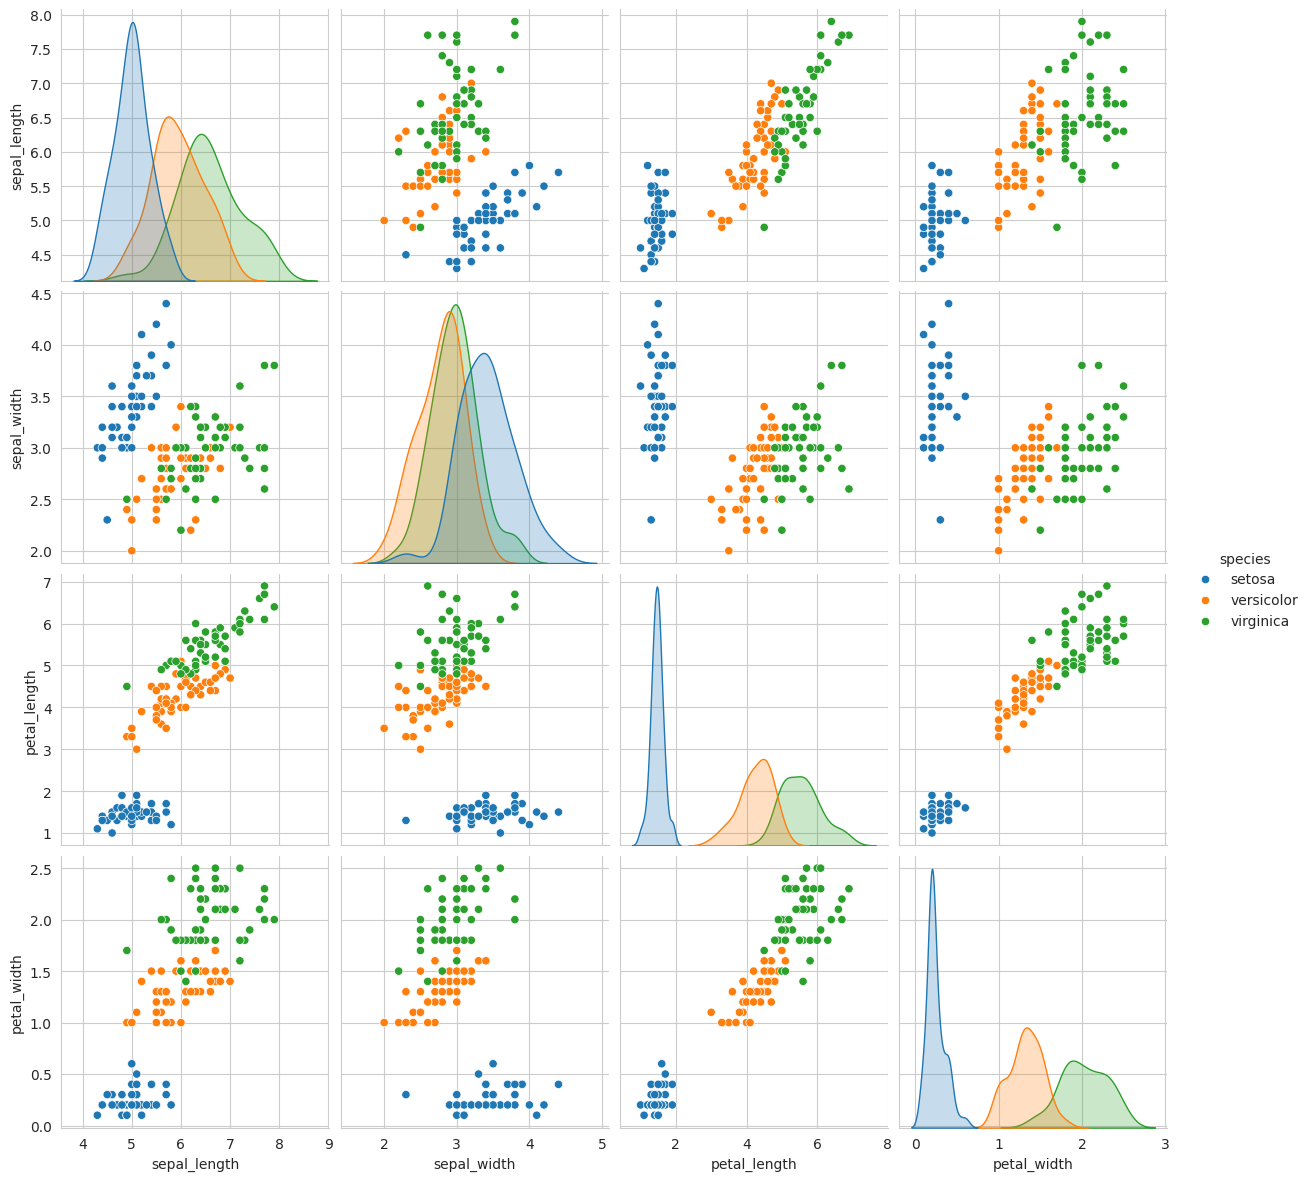

In [4]:
#Load Iris.csv into a pandas dataFrame.
iris_dataset = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

#Pair plots for iris dataset
import seaborn as sns
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris_dataset, hue="species", size=3);
plt.show()

From the pair plots above, we can see that <font color='blue'>petal length</font> and <font color='blue'>petal width</font> are the <font color='blue'>two most important features</font> that <font color='blue'>visually separates</font> the <font color='blue'>three classes of flower</font> most accurately. We can visually differentiate them through looking at the pair plots. We don't even need machine learning models to predict the class labels. Now let's build a model and try out different classifiers and different ensemble techniques to find out how they behave on the Iris dataset.

### Bagging.

The first ensemble technique that we will discuss is <font color='blue'>Bagging</font>. Bagging stands for <font color='blue'>bootstrap aggregation</font>. It's a very very interesting idea in ensemble learning! Bagging is one of the <font color='blue'>earliest yet powerful ensemble algorithm</font> that exists even today. The <font color='blue'>core idea</font> of bagging is to use <font color='blue'>bootstrapped replicas</font> of the <font color='blue'>original dataset</font> and use them to <font color='blue'>train different classifiers</font>. Suppose we are given a dataset, we will <font color='blue'>create subsets</font> by <font color='blue'>randomly sampling</font> a bunch of <font color='blue'>points</font> from the <font color='blue'>original data</font>, with replacement. Now we will <font color='blue'>train individual classifiers</font> on <font color='blue'>each</font> of these <font color='blue'>bootstrapped subsets</font>. Each of these <font color='blue'>base classifiers</font> will <font color='blue'>predict</font> the <font color='blue'>class label</font> for a <font color='blue'>given problem</font>. This is where we <font color='blue'>combine</font> the <font color='blue'>predictions</font> of <font color='blue'>all</font> the <font color='blue'>base models</font>. This part is called the <font color='blue'>aggregation stage</font>. Typically a simple <font color='blue'>majority vote</font> is used in a <font color='blue'>classification system</font> and taking the <font color='blue'>mean</font> of <font color='blue'>all predictions</font> for regression models, to combine all the base classifiers into one single model to provide the final output of the ensemble model. A typical example of such an approach is the <font color='blue'>Random Forest</font> algorithm. Bagging <font color='blue'>reduces</font> the <font color='blue'>high variance</font> of a model while keeping the bias constant, thereby <font color='blue'>reducing</font> the <font color='blue'>generalization error</font>. Bagging is a very efficient method especially when you have <font color='blue'>very limited data</font>. By using bootstrapped samples we are able to get an estimate by aggregating the scores over many samples. Please take a look at the below diagrams to get an intuitive understanding of how bagging works at different stages.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*X95SV4OlhtD-_8doaSuw8w.png)

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*JksRZ1E72Rsx2s8lQbNR1w.jpeg)

Let us understand the above diagram with the help of an example. Let's say we have a <font color='blue'>training dataset</font> which contains <font color='blue'>100,000 data points</font>. We will create <font color='blue'>N subsets</font> by <font color='blue'>randomly sampling 50,000 data points</font> for <font color='blue'>each subset</font>. So we have a <font color='blue'>total</font> of <font color='blue'>N datasets</font> now. Each of these N datasets will be used to <font color='blue'>train N different classifiers</font>. At the <font color='blue'>aggregation stage</font>, all these <font color='blue'>N predictions</font> will be <font color='blue'>combined</font> into one <font color='blue'>single model</font> also called the <font color='blue'>meta-classifier</font>. Out of the <font color='blue'>100,000 points present</font> originally present in the dataset, if we <font color='blue'>remove 1000 points</font>, the impact it will have on the <font color='blue'>sampled datasets</font> will be <font color='blue'>small</font>. If you think <font color='blue'>intuitively</font>, some of these 1000 points might <font color='blue'>not be present</font> in <font color='blue'>all the sampled datasets</font> at all and thus the number of points that will be removed from each sampled dataset will be small. It could even be zero in some cases. Thus, by using the bootstrap aggregation strategy, the <font color='blue'>impact</font> of <font color='blue'>removing 1000 points</font> from the <font color='blue'>original training set</font> will be <font color='blue'>small</font> on the <font color='blue'>sampled datasets</font>. To sum it up, the impact of removing 1000 such points will be small on the base learners, thereby <font color='blue'>reducing the variance</font> in a model and making it more robust. Variance is nothing but sensitivity to noise as we have discussed earlier.  

In the code sample below, first, what we do is <font color='blue'>initialize 8 different base learners</font>. We will <font color='blue'>fit</font> each of these <font color='blue'>8 base learners</font> to our <font color='blue'>training set</font> and <font color='blue'>compare it's accuracy</font> to the bagging versions of each of the classifiers. In most of the cases below, we see that there is a <font color='blue'>slight increase</font> in the <font color='blue'>model's accuracy</font> when we use the <font color='blue'>bagging version</font> of each classifier as compared to the normal ones. For this classification task, we will use a <font color='blue'>3 fold cross-validation</font> to obtain the accuracy scores across different folds. You can increase the number of folds if you have a large real-world training set. For each of the base learners selected below, we see that bagging actually works! Using bagging has actually improved the accuracy by a certain margin (most notably in the AdaBoostClassifier).

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)

iris_dataset = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)

RANDOM_SEED = 0

#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
et_clf = ExtraTreesClassifier(n_estimators=5, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
rg_clf = RidgeClassifier(alpha=0.1, random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
adab_clf = AdaBoostClassifier(n_estimators=5,learning_rate=0.001)

classifier_array = [rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf]
labels = [clf.__class__.__name__ for clf in classifier_array]

normal_accuracy = []
normal_std = []

bagging_accuracy = []
bagging_std = []

for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=3, random_state=RANDOM_SEED)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)

    normal_accuracy.append(np.round(cv_scores.mean(),4))
    normal_std.append(np.round(cv_scores.std(),4))

    bagging_accuracy.append(np.round(bagging_scores.mean(),4))
    bagging_std.append(np.round(bagging_scores.std(),4))

    print("Accuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))
    print("Accuracy: %0.4f (+/- %0.4f) [Bagging %s]\n" % (bagging_scores.mean(), bagging_scores.std(), clf.__class__.__name__))

Accuracy: 0.9667 (+/- 0.0189) [Normal RandomForestClassifier]
Accuracy: 0.9667 (+/- 0.0189) [Bagging RandomForestClassifier]

Accuracy: 0.9533 (+/- 0.0094) [Normal ExtraTreesClassifier]
Accuracy: 0.9533 (+/- 0.0249) [Bagging ExtraTreesClassifier]

Accuracy: 0.9467 (+/- 0.0094) [Normal KNeighborsClassifier]
Accuracy: 0.9867 (+/- 0.0094) [Bagging KNeighborsClassifier]

Accuracy: 0.9600 (+/- 0.0163) [Normal SVC]
Accuracy: 0.9733 (+/- 0.0189) [Bagging SVC]

Accuracy: 0.7933 (+/- 0.0340) [Normal RidgeClassifier]
Accuracy: 0.8200 (+/- 0.0432) [Bagging RidgeClassifier]

Accuracy: 0.9733 (+/- 0.0189) [Normal LogisticRegression]
Accuracy: 0.9800 (+/- 0.0163) [Bagging LogisticRegression]

Accuracy: 0.9333 (+/- 0.0189) [Normal DecisionTreeClassifier]
Accuracy: 0.9533 (+/- 0.0249) [Bagging DecisionTreeClassifier]

Accuracy: 0.6600 (+/- 0.0000) [Normal AdaBoostClassifier]
Accuracy: 0.9600 (+/- 0.0163) [Bagging AdaBoostClassifier]



Here, in the <font color='blue'>below code sample</font> what we do is <font color='blue'>visually see</font> how the <font color='blue'>accuracy improves</font> on using a <font color='blue'>bagging classifier</font> as compared to a normal one. The <font color='blue'>black line</font> present at the top of each bar indicates the <font color='blue'>variance</font> in the model. As we can see, the <font color='blue'>variance mostly reduces</font> when we use the <font color='blue'>bagging version</font> of any classifier. However, for <font color='blue'>some models</font>, we also have a situation where the <font color='blue'>variance increases slightly</font> more than the normal version of the classifier. This is mostly because of a lack of training data points. Remember we have only 150 observations in our training dataset. Greater the number of data points in our train set, more robust will the final models be. However, from a simple implementation point of view, this code sample helps us understand how to <font color='blue'>implement</font> the concept of <font color='blue'>bootstrap aggregation</font>.

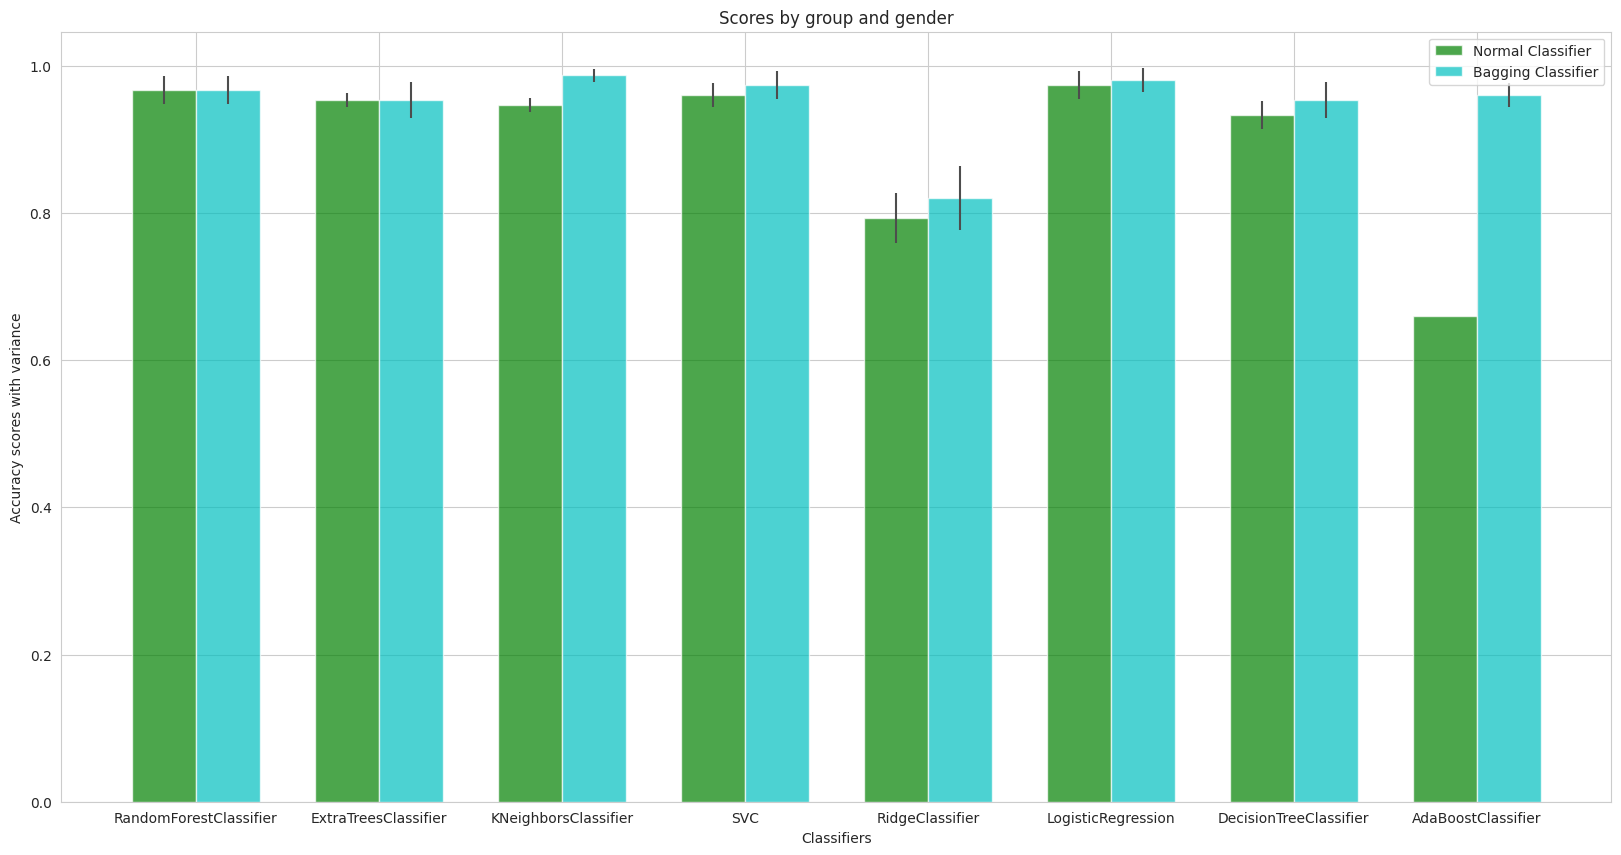

In [7]:
### Bagging.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(20,10))
n_groups = 8
index = np.arange(n_groups)
bar_width = 0.35

opacity = .7
error_config = {'ecolor': '0.3'}

normal_clf = ax.bar(index, normal_accuracy, bar_width, alpha=opacity, color='g', yerr=normal_std, error_kw=error_config, label='Normal Classifier')
bagging_clf = ax.bar(index + bar_width, bagging_accuracy, bar_width, alpha=opacity, color='c', yerr=bagging_std, error_kw=error_config, label='Bagging Classifier')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy scores with variance')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((labels))
ax.legend()

#fig.tight_layout()

plt.show()

### Impact of change in bagging accuracies with an increase in the sub-sampling ratio.

A very <font color='blue'>important factor</font> to be kept in mind while building <font color='blue'>bagging classifiers</font> is that the <font color='blue'>accuracy</font> of a model doesn't always increase when we <font color='blue'>increase the sub-sampling ratio</font>. In the Bagging Classifier library, <font color='blue'>subsampling</font>, i.e. the fraction of data that gets into each of the base learners, is denoted by the parameter <font color='blue'>max_samples</font>. In the code sample below, we will see the display the <font color='blue'>bagging scores</font> for each of the base learners at <font color='blue'>various subsampling ratio</font>. We will also plot the bagging scores for each of the base learners in a line chart to get a more intuitive understanding of this concept - that is bagging scores doesn't necessarily increase when we increase the sub-sampling ratio.

In [8]:
### Display the accuracy of different bagging classifiers at various sub sampling ratio in a Pretty table.

subsampling_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

various_bagging_scores = []

for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    #print("\nAccuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))

    mean_bagging_score = []
    for ratio in subsampling_ratio:
        bagging_clf = BaggingClassifier(clf, max_samples=ratio, max_features=3, random_state=RANDOM_SEED)
        bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)
        mean_bagging_score.append(bagging_scores.mean())
        #print("Bagging accuracy: %0.4f [max_samples %0.2f]" % (bagging_scores.mean(), ratio))
    various_bagging_scores.append(mean_bagging_score)

various_bagging_scores.insert(0,subsampling_ratio)

#Compare performance and display it in a pretty table.
from prettytable import PrettyTable
table = PrettyTable()
labels.insert(0,"Max Samples")
#table.field_names = label_models

index=0

for value in various_bagging_scores:
    table.add_column(labels[index],value)
    index += 1
print(table)

+-------------+------------------------+----------------------+----------------------+--------------------+--------------------+--------------------+------------------------+--------------------+
| Max Samples | RandomForestClassifier | ExtraTreesClassifier | KNeighborsClassifier |        SVC         |  RidgeClassifier   | LogisticRegression | DecisionTreeClassifier | AdaBoostClassifier |
+-------------+------------------------+----------------------+----------------------+--------------------+--------------------+--------------------+------------------------+--------------------+
|     0.1     |   0.9466666666666667   |  0.9466666666666667  |  0.9666666666666667  | 0.9666666666666667 | 0.8266666666666667 |        0.96        |          0.94          | 0.9266666666666666 |
|     0.2     |   0.9533333333333333   |  0.9666666666666667  |  0.9733333333333333  | 0.9666666666666667 | 0.7933333333333333 | 0.9733333333333333 |          0.94          | 0.9466666666666667 |
|     0.3     |     

This code sample helps us understand that the <font color='blue'>bagging accuracy doesn't always increase</font> when we <font color='blue'>increase the sub-sampling ratio</font>. In the plot below, we can clearly see for <font color='blue'>AdaBoost classifier</font> (denoted by the <font color='blue'>maroon</font> line), that the bagging accuracy drops to a significantly lower value when we increase the <font color='blue'>sampling ration from 0.7 to 0.8</font>. For the Decision Tree classifier, the bagging accuracy falls beyond the sampling ratio of 0.4. This behavior is almost the same for all the different base learners. There is absolutely no evidence of the fact that a higher sub-sampling ratio means a higher bagging accuracy. I have taken my sampling ratio to be 0.4. You can try and experiment with different values on a different dataset and see if you find any correlation between the sub-sampling ratio and the bagging accuracy.

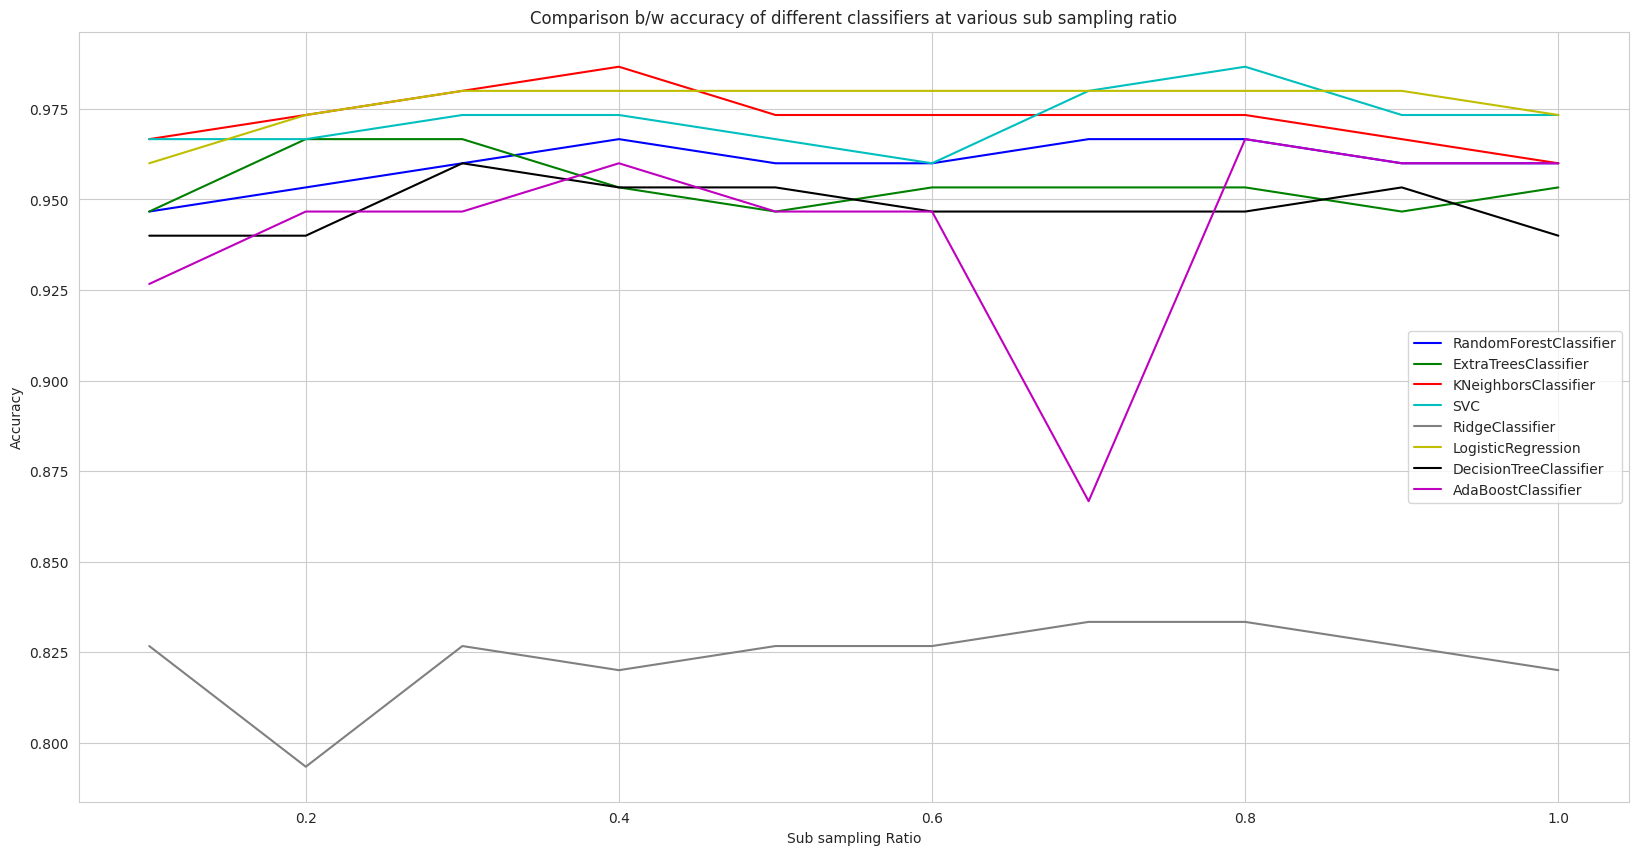

In [9]:
#Plot the bagging scores using a line chart.
labels.remove("Max Samples")
various_bagging_scores.remove(various_bagging_scores[0])

x_axes = subsampling_ratio

color_map = ['blue','g','r','c','grey','y','black','m']
plt.figure(figsize=(20,10))
for index in range(0,len(labels)):
    plt.plot(x_axes, various_bagging_scores[index], color=color_map[index], label=labels[index])
plt.xlabel('Sub sampling Ratio')
plt.ylabel('Accuracy')
plt.title("Comparison b/w accuracy of different classifiers at various sub sampling ratio")
plt.legend()
plt.show()

### Boosting:

The second ensemble technique that we are going to discuss today is called Boosting. Boosting, in general, is used to convert weak learners to strong ones. Weak learners are basically classifier which has a very weak correlation with the true class labels and strong learners are classifiers that have a very high correlation between the model and the true class labels. Boosting involves training the weak learners iteratively, each trying to correct the error made by the previous model. This is achieved by training a weak model on the whole training data, then building a second model which aims at correcting the errors made by the first model. Then we build a third model which will correct the errors made by the second model and so on. Models are added iteratively until the final model has corrected all the errors made by all the previous models. When the models are added at each stage, some weights are assigned to the model which is related to the accuracy of the previous model. After a weak classifier is added, the weights are re adjusted. The misclassified points are given a higher weight and correctly classified points are assigned lower weights. Such an approach will make the next weak classifier to focus on the errors made by the previous model. Boosting reduces generalization error by taking a high-bias & low-variance model and reducing the bias by a significant level. Remember, bagging reduces variance. Similar to bagging, boosting also lets us work with both classification and regression models. Please take a look at the below diagrams to intuitively understand how boosting works at each of the stages. The diagram at the left shows the different stages in a boosting algorithm. On the right hand side you can see the pseudo code for the boosting algorithm. The pseudo code is taken from the link mentioned at the bottom of the pseudo code.

<tr>
<td> <img src="BoostingFINAL.jpg"> </td>
<td> <img src="BoostingAlgo.png"> </td>
</tr>

Let's understand the above diagram with an example. Suppose we are given a dataset D, the first thing that we will do at stage 0 is train a model on the whole dataset. The model may be either a classification or a regression model. Let's name this model M_0. Let us assume this model M_0 is trying to fit a function h_0(x). Thus the prediction function for this model is given by y_pred=h_0(x). Model 0 is designed to have a high bias. Generally boosting is applied for a high bias and low variance model. High bias in a model basically refers to a high training error. High bias arises mostly due to some incorrect assumptions made at the training stage. Now, after building the first model we will, at stage 0, get the error in prediction for each data points made by the model M_0. So, the error in the prediction for any class label is given by y-y_pred. Remember, there are lots of lots of error functions out there - for example, the squared error, the hinge loss error, the logistic loss error etc. But, for simplicity, I have taken a simple difference error for this example. Now that we have done these things in stage 0, what we will do in stage 1 is as follows. I will try fit a model M_1 on the errors produced by the model at stage 0. Remember, M_1 is not training on the actual class labels. M_1 is training on the errors we have got at the end of stage 0. Let's say we get a function h_1(x), which has trained on the errors generated by model M_0. Thus at end of stage 1, my final model will actually be the weighted sum of the previous two prediction functions (as shown in the diagram). We will assign weights a_0 and a_1 to h_0(x) and h_1(x) respectively. Thus at the end of stage 1, the model looks like this : F_1(x) = a_0 * h_0(x) + a_1 * h_1(x), where a_0 and a_1 are weights assigned to the prediction functions. Remember, the weights will always be higher for functions which has a high misclassification error. In this way, we can make the next model in the sequence to focus more on the errors made by the previous model. Similarly, the model at the end of stage 2 will have the function F_2(x) = a_0 * h_0(x) + a_1 * h_1(x) + a_2 * h_2(x). Thus at the end of all stages, the final model that we have is given by summation of a_i * h_x(i), where the value of i ranges from 1 to N. Thus, intuitively if we think we are actually reducing the training error which means in other words we are actually reducing the bias of a model.

We will look at some of the most popular boosting classifiers in the below code sample. We will also see how using boosting increases the overall accuracy in prediction using an EnsembleVoteClassifier. EnsembleVoteClassifier is a very powerful class available in the MLEXTEND package, which is used to combine the predictions of different machine learning models by using the concept of majority voting. The EnsembleVoteClassifier implements two types of voting approach - "hard" and "soft". In a "hard" voting approach we will predict the class label of the final model based on the majority vote obtained from all the base classifiers. For example, if 7 out of 10 base learners predicts the class label to be "Yes" in a binary classification problem, we will take "Yes" to be the final class label of the final ensemble model. Anyway, in the below example we see that the accuracy increases to 0.967 (when we use boosted classifiers with majority voting) as compared to the highest accuracy of an individual model which was 0.961, although the increase is very slight. Still, you got my point!  

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier

ada_boost = AdaBoostClassifier(n_estimators=5)
grad_boost = GradientBoostingClassifier(n_estimators=10)
xgb_boost = XGBClassifier(max_depth=5, learning_rate=0.001)

ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: {0:.3f}, Variance: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Acuuracy: 0.967, Variance: (+/-) 0.018 [Ada Boost]
Acuuracy: 0.960, Variance: (+/-) 0.027 [Gradient Boost]
Acuuracy: 0.961, Variance: (+/-) 0.042 [XG Boost]
Acuuracy: 0.967, Variance: (+/-) 0.033 [Ensemble]


Here, we look at the decision boundaries by each boosted classifiers, and how all the three base models classify the data over a region. We will also take a look at the decision region generated by the voting classifier. In the MLEXTEND package, there is a very powerful library called "plot_decision_regions" which can be used to visually see the decision regions for different classifiers. You can check their GitHub profile for more techniques in this link: http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/. Anyway, in the below example I have trained and fitted the model to two of the most important features, i.e. "petal_length" and "petal_width". Remember, the pair plots above?

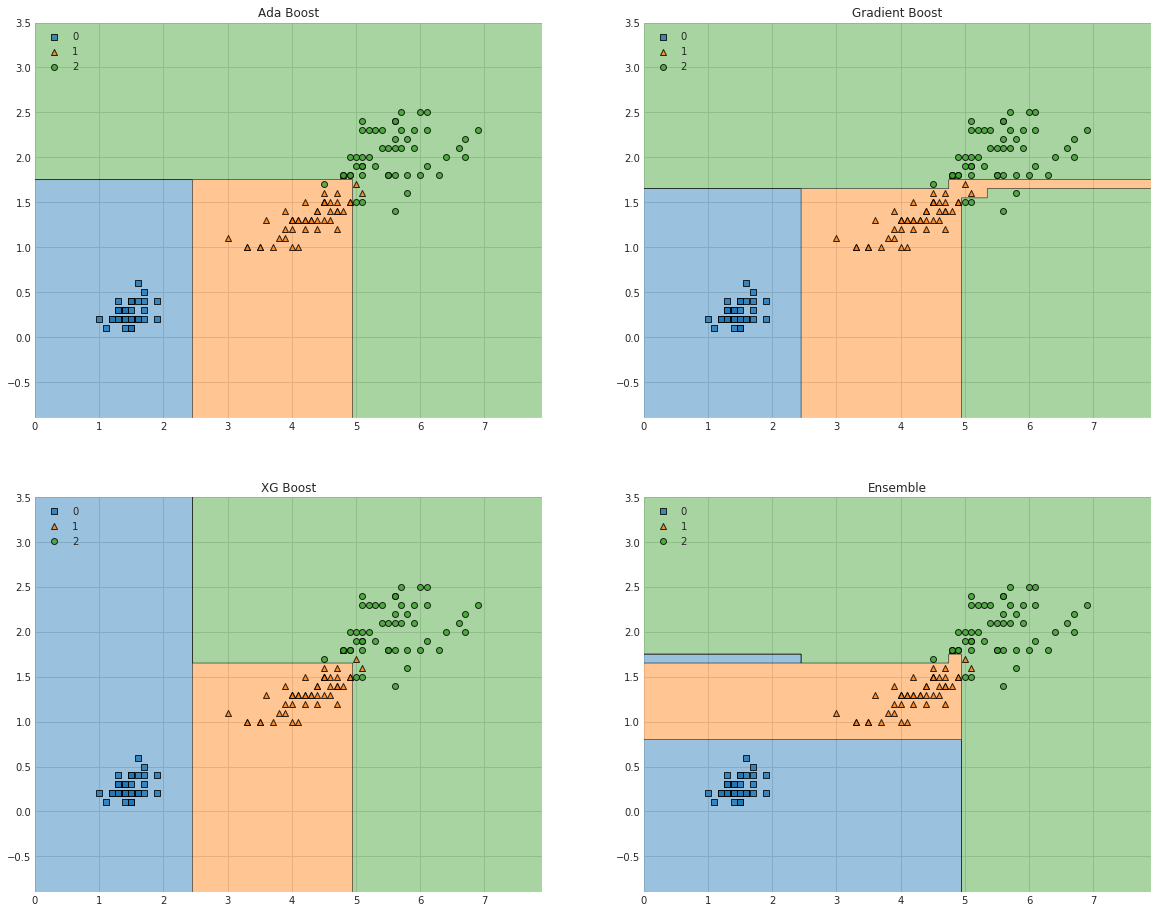

In [ ]:
#Decision Regions for all the boosting algorithms.
X = np.array(iris_dataset[['petal_length','petal_width']])
y = np.array(y)

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))

for clf, label, grd in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

### Stacking.

Stacking is an ensemble learning technique which is used to combine the predictions of diverse classification models into one single model also known as the meta-classifier. All the individual models are trained separately on the complete training data set and fine-tuned to achieve a greater accuracy. The bias and variance trade-off is taken care off for each model. The final model, also known as the meta-classifier is fed either the class labels predicted by the base models or the predicted probabilities for each class label. The meta-classifier is then trained based on the outputs given by the ensemble models. In stacking, a new model is trained based on the predictions made by the previous models. This process takes place sequentially. This means several models are trained at stage 1 and are fine-tuned. The predicted probabilities of each model from stage 1 are fed as an input to all the models at stage 2. The models at stage 2 are then fine-tuned and the corresponding outputs are fed to models at stage 3 and so on. This process occurs multiple times based on how many layers of stacking one would like to use. The final stage consists of one single powerful model, which gives us the final output by combining the output of all the models present in the previous layers. This single powerful model at the end of a stacking pipeline is called the meta-classifier. Often times, using stacking classifiers increases the prediction accuracy of a model. But in no way can there be a guarantee that using stacking will increase the prediction accuracy at all times! Take a look at the below diagrams to understand how stacking works. You can refer to the MLEXTEND GitHub page highlighted in bold to get more ideas on how to implement stacking in different scenarios.  

<tr>
<td> <img src="StackingFINAL.jpg"> </td>
<td> <img src="StackingAlgo.png"> </td>
</tr>

In the below code sample, we will use eight different base learners and train each of them on the whole dataset. Each of these models can be fine-tuned using grid search cross-validation. Each of these N models will predict eight class labels. At the final stage, the predictions of all the base models are combined using majority voting (for classification tasks), to create a final model called the meta-classifier. The meta-classifier in our case is the logistic regression model. As we can see from the outputs below, stacking has indeed managed to increase the accuracy of the final model although the increase is very less. But you get the idea! Like the previous examples, we will use a 3 fold cross-validation. Again, you can experiment with this value when you work with some real-world datasets. Further down, in a separate example, we will try grid search cross-validation on the base learners and see if the overall accuracy increases (well, it should actually)

In [ ]:
RANDOM_SEED = 0

X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)

#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
et_clf = ExtraTreesClassifier(n_estimators=5, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
rg_clf = RidgeClassifier(alpha=0.1, random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
adab_clf = AdaBoostClassifier(n_estimators=100)
lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier

sclf = StackingClassifier(classifiers=[rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf], meta_classifier=lr)

classifier_array = [rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf, sclf]
labels = [clf.__class__.__name__ for clf in classifier_array]

acc_list = []
var_list = []

for clf, label in zip(classifier_array, labels):
    cv_scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
    acc_list.append(np.round(cv_scores.mean(),4))
    var_list.append(np.round(cv_scores.std(),4))
    #print("Accuracy: {} (+/- {}) [{}]".format(np.round(scores.mean(),4), np.round(scores.std(),4), label))

Accuracy: 0.9538 (+/- 0.0367) [RandomForestClassifier]
Accuracy: 0.9408 (+/- 0.0420) [ExtraTreesClassifier]
Accuracy: 0.9534 (+/- 0.0087) [KNeighborsClassifier]
Accuracy: 0.9400 (+/- 0.0321) [SVC]
Accuracy: 0.7998 (+/- 0.0058) [RidgeClassifier]
Accuracy: 0.9542 (+/- 0.0515) [LogisticRegression]
Accuracy: 0.9473 (+/- 0.0329) [DecisionTreeClassifier]
Accuracy: 0.9600 (+/- 0.0161) [AdaBoostClassifier]
Accuracy: 0.9608 (+/- 0.0424) [StackingClassifier]


### A bar graph to see stacking actually increases the accuracy.

The below code block will plot the accuracy values for each of the base learners and also the accuracy of the final meta-classifier. We have managed to increase the accuracy value very slightly from 0.9600 (highest accuracy obtained from a single base learner) to 0.9608 (using the stacking classifier).

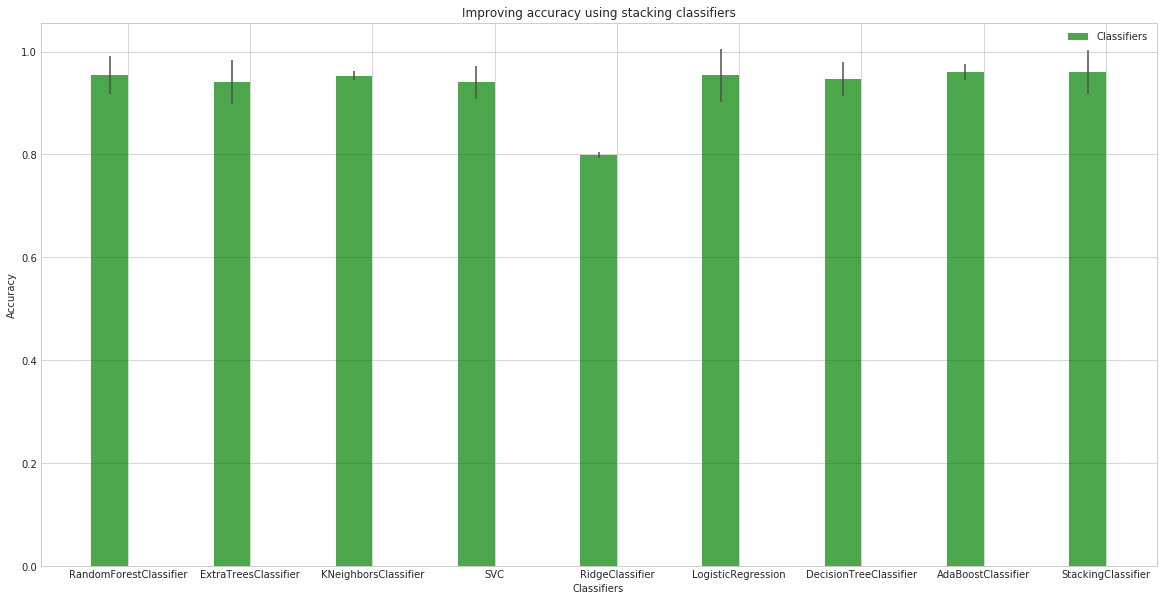

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
n_groups = 9
index = np.arange(n_groups)
bar_width = 0.30

opacity = .7
error_config = {'ecolor': '0.3'}

normal_clf = ax.bar(index, acc_list, bar_width, alpha=opacity, color='g', yerr=var_list, error_kw=error_config, label='Classifiers')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Improving accuracy using stacking classifiers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((labels))
ax.legend()
plt.show()

For simplicity, we will look at the decision regions obtained using three of our base learners and also the final stacked meta-classifier. The three base learners that we will select for this purpose are RandomForestClassifier, SupportVectorClassifer, and RidgeClassifier. As like before, I will train and fit the model to two of the most important features, i.e. "petal_length" and "petal_width".

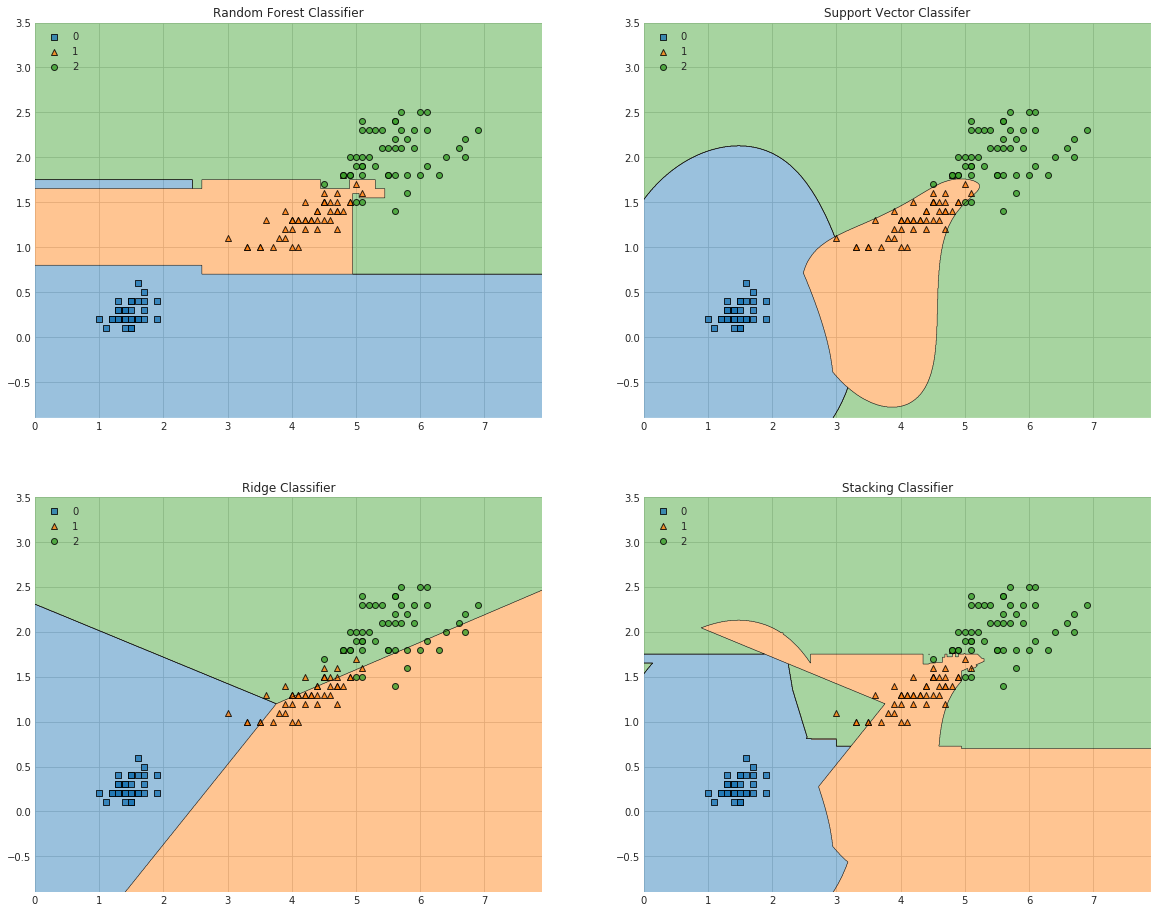

In [ ]:
#Decision Regions for 4 algorithms.
X = np.array(iris_dataset[['petal_length','petal_width']])
y = np.array(y)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))


for clf, label, grd in zip([rf_clf, svc_clf, rg_clf, sclf], ["Random Forest Classifier", "Support Vector Classifer", "Ridge Classifier", "Stacking Classifier"], itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

Instead of using the actual class label of the base learners, we can also use the probability scores of each of the base models to train the meta-classifier. For this, we need to set "use_probas=True". Using "average_probas=True" the probability scores of each of the base learners are averaged. However, setting "average_probas=False" means that the probability scores for each of the base learners are stacked and they are all passed as input to the next level classifiers. Note, that we have actually managed to increase the accuracy of the stacking classifiers by using probability score. 0.9673 as compared to 0.9608, as you would see in the example below!

In [ ]:
RANDOM_SEED = 0
from sklearn.naive_bayes import GaussianNB

X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)

#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
et_clf = ExtraTreesClassifier(n_estimators=5, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
adab_clf = AdaBoostClassifier(n_estimators=100)
lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier
gnb_clf = GaussianNB()

#sclf = StackingClassifier(classifiers=[rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf], use_probas=True, average_probas=False, meta_classifier=lr)
sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, gnb_clf, lr_clf, et_clf, dt_clf, adab_clf], use_probas=True, average_probas=False, meta_classifier=lr)

classifier_array = [rf_clf, knn_clf, gnb_clf, lr_clf, et_clf, dt_clf, adab_clf, sclf]
labels = [clf.__class__.__name__ for clf in classifier_array]

for clf, label in zip(classifier_array, labels):
    cv_scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))

Accuracy: 0.9538 (+/- 0.0367) [RandomForestClassifier]
Accuracy: 0.9534 (+/- 0.0087) [KNeighborsClassifier]
Accuracy: 0.9342 (+/- 0.0328) [GaussianNB]
Accuracy: 0.9542 (+/- 0.0515) [LogisticRegression]
Accuracy: 0.9408 (+/- 0.0420) [ExtraTreesClassifier]
Accuracy: 0.9473 (+/- 0.0329) [DecisionTreeClassifier]
Accuracy: 0.9600 (+/- 0.0161) [AdaBoostClassifier]
Accuracy: 0.9673 (+/- 0.0333) [StackingClassifier]


Now let us implement stacking using Grid Search cross-validation to fine tune the base learners. For simplicity, I will use three base learners and one final meta-classifier. Needless to say, you can use as many models as you want as long as you know how the implementation works and what the specific hyperparameters are for each base learners. Please note that I have used the same set of classifiers as shown in the first example of stacking. This time with Grid Search cross-validation. Let's find out if the accuracy increases.

In [ ]:
from sklearn.model_selection import GridSearchCV

RANDOM_SEED = 0

X, y = iris_dataset.iloc[:,0:4], iris_dataset.iloc[:,4]

from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()
y = encoder_object.fit_transform(y)


#Base Learners.
rf_clf = RandomForestClassifier(random_state=RANDOM_SEED,n_jobs=-1)
knn_clf = KNeighborsClassifier(p=2, metric='minkowski',n_jobs=-1)
dt_clf = DecisionTreeClassifier(criterion='gini', random_state=RANDOM_SEED)
lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier

#sclf = StackingClassifier(classifiers=[rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf], meta_classifier=lr)
sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, dt_clf], meta_classifier=lr)

print("\nAccuracies of all classifiers using grid search cross validation.")

params = {'randomforestclassifier__n_estimators': np.arange(10,20), 'randomforestclassifier__max_depth': np.arange(1,5),
          'kneighborsclassifier__n_neighbors': np.arange(1,20,2),
          'decisiontreeclassifier__max_depth': np.arange(1,5),
          'meta-logisticregression__C': [0.001,0.01,0.1,1,10,100,1000]}


gsearch_cv = GridSearchCV(estimator=sclf, param_grid=params, cv=5, refit=True)
gsearch_cv.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

print('Best parameters: %s' % gsearch_cv.best_params_)
print('Accuracy: %.2f' % gsearch_cv.best_score_)


Accuracies of all classifiers using grid search cross validation.
Best parameters: {'decisiontreeclassifier__max_depth': 1, 'kneighborsclassifier__n_neighbors': 7, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__max_depth': 3, 'randomforestclassifier__n_estimators': 15}
Accuracy: 0.98


### Decision boundaries of the above stacking classifiers using the best hyperparameter values.

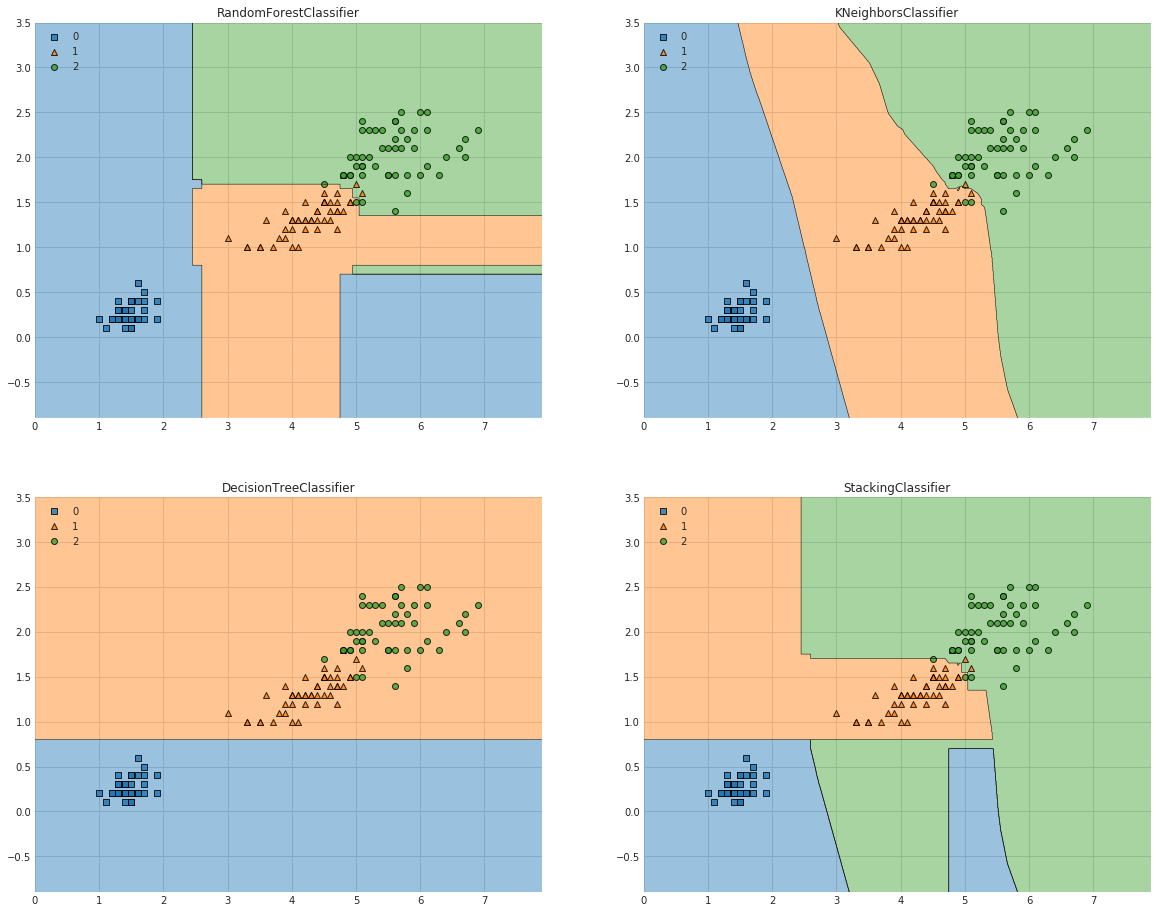

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

#Decision Regions for 4 algorithms.
X = np.array(iris_dataset[['petal_length','petal_width']])
y = np.array(y)

#Base Learners.
rf_clf = RandomForestClassifier(max_depth=3,n_estimators=15,random_state=RANDOM_SEED,n_jobs=-1)
knn_clf = KNeighborsClassifier(n_neighbors=7,p=2, metric='minkowski',n_jobs=-1)
dt_clf = DecisionTreeClassifier(max_depth=1,criterion='gini', random_state=RANDOM_SEED)
lr = LogisticRegression(C=0.1,random_state=RANDOM_SEED) # meta classifier
sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, dt_clf], meta_classifier=lr)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))


for clf, label, grd in zip([rf_clf, knn_clf, dt_clf, sclf], ["RandomForestClassifier", "KNeighborsClassifier", "DecisionTreeClassifier", "StackingClassifier"], itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()



### Multi-Level stacking.

The examples I have covered for Stacking classifiers are all ensemble models which has one single level. But in general multiple models can be stacked across multiple level. I will show you one such Stacking design used by the winners of the Kaggle KDD cup compeition. This image was uploaded in a PPT designed by the SAS team, by author Jeong-Yoon Lee. You can check this wonderful video in youtube at this link:https://www.youtube.com/watch?v=9IyJ4HvubGo&t=1070s, for further elaborations.

<img src="EnsembleLevels.png">

The above stacking model uses 64 base learners on seven feature sets at level 1. All the 64 models are trained independently on the training set. The predictions of these 64 models are fed to Stage 1 ensemble classifiers which has 15 more models. The predictions of these 15 models are further combined using majority vote and their output is fed to Stage 2 ensemble classifiers, which has 2 models. Finally, the output of these 2 models are fed to the meta-classifier in Stage 3, which gives us the final output of the model.



### Cascading classifiers.

Cascading, according to Google, in simple English literature means "a process whereby something, typically information or knowledge, is successively passed on". Cascading is one of the most powerful ensemble learning algorithm which is used by Machine Learning engineers and scientists when they want to be absolutely dead sure about the accuracy of a result. For example, suppose we want to build a machine learning model which would detect if a credit card transaction is fraudulent or not. If you think about it, it's a binary classification problem where a class label 0 means the transaction is not fraud & a class label 1 means the transaction is fraudulent. In such a model, it's very risky to put our faith completely on just one model. So what we do is build a sequence of models (or a cascade of models) to be absolutely sure about the fact that the transaction is not fraudulent. Cascade models are mostly used when the cost of making a mistake is very very high. I will try to explain cascading with the help of a simple diagram.

<img src="CascadingTESTING.jpg">

Look at the above diagram. Given that we have a transaction query point Xq, we will feed it to Model 1. Model 1 can be anything - a random forest, or a logistic regression model or maybe a support vector machine. It can be anything! Basically what Model 1 does is that it predicts class probabilities to determine to which class do a given query point has higher chances of belonging to. Let's say class label 1 means the transaction is fraudulent, and class label 0 means the transaction is not fraud. Typically, the predicted probabilities is given by this - P(Yq=0) and P(Yq=1), where Yq is our actual class label. Now let's assume that P(Yq=0), i.e. the probability of the transaction to be not fraudulent is very high. If you think carefully, if P(Yq=0) is extremely high, we will say that the transaction is not fraud. Let's assume we have set a threshold of 99%. It means if and only if P(Yq=0) > 0.99, we will declare the final prediction to be not fraudulent. However, if P(Yq=0) < 0.99 we are not very sure if or not it's a fraudulent transaction although though there is a high chance that the transaction is not fraudulent. In such a case, when P(Yq=0) < 0.99, we want to be really really sure that the transaction is not fraudulent. We need to be absolutely careful because if our model fails to detect a fraudulent transaction we might lose millions of dollars! So even when we are slightly unsure, we will train another Model 2. Model 2 does the same thing, it receives the query point and predicts P(Yq=0). Just like in stage 1, if P(Yq=0) > 0.99, we will declare the transaction to be not fraudulent and terminate the loop. But again if we get P(Yq=0) < 0.99, we aren' sure! Hence, we will pass the query point to another Model 3 in the cascade which does the same thing. In a typical cascading system the complexity of models increases as we add more and more models to the cascade.  Please note that all the models in a cascade are super powerful and has a very high accuracy on unseen data. However, it might happen that none of the models can give us a value of P(Yq=0) > 0.99. In such a case, typically there is a human being who sits at the end of a cascade. This person will personally call the customer and ask him whether or not he has done the transaction. Now, we are absolutely certain that the transaction is not a fraud one when the customer says that he is the one who has done the transaction.

<img src="CascadingTRAINING.jpg">

The above diagram shows us the different stages of training in a cascade system of classifiers. Here we have four models in a sequence. We will train model 1 on the whole training dataset and evaluate its performance on the test dataset. Now wherever we are sure that the class label is 0, we will categorize all such points in a dataset D'. This is at stage 1 of the training phase. Thus D' contains all such data points for which the class label is 0, i.e. the transaction is not fraudulent. Now, wherever we are not sure about some data points (if they are fraudulent or not) we pass it to the next stage i.e. Model 2 in our case. Hence, model 2 will only train on the dataset which does not contain points from D'. Model 2 can't be exposed to all such points for which we are sure that the class label is 0. It will only train on the points for which we are not sure. After this, we will put all such points in a dataset D'' for which we are sure that they belong to class label 0 at the end of stage 2. We will repeat the same procedure for stage 3 as well unless the training phase reaches the final model. Intuitively, if you think about it, the cascades are designed in such a way that the next model in the sequence is only trained on the data points for which the model isn't sure what the class label is. We must always train our model as per what type of data it would see during runtime.

I hope I was able to give an intuition of how cascading in machine learning works! For the above explanations on cascading, I have referred to Mr. Varma's teachings from AAIC. I have not provided any code samples for cascading classifiers as I have not implemented it. Keep watching this space for more. I will update this blog in future with code samples on how to build cascade classifiers after I have implemented it myself.

There is a very interesting paper on cascading models written by few Ph.D. folks at Stanford University. These guys have actually build a framework called Cascaded Classification Models (CCM), which aims at improving the accuracy/performance at each level by repeatedly instantiating the classifiers coupled by their input/output variables in a cascade. You can read more about the paper at this link: https://ai.stanford.edu/~koller/Papers/Heitz+al:NIPS08a.pdf

There is also a very interesting blog on how to build a face detection model using cascade classifiers. If you are interested you can visit http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_face_detection.html to see how it works!

****CLOSING NOTE******

If you have come this far, thank you for having the immense patience to read through all the stuffs. I hope I was able to make you guys understand what ensemble techniques are and how do they increase the accuracy in Machine Learning models. In general, ensemble learnings are mostly used by Kaggle participants to extremely fine-tune their models. In industries however, stacking huge models in several levels is a very costly procedure. And a 0.5% increase in accuracy practically wont have the greatest of impact on business problems. However, for Kaggle competetions ensemble techniques are state of the art strategies that can be used to increase the accuracy by maybe 0.001, which might just help you to win the competetion!

Here are few solid recommendations as part of some additional readings on ensemble learning algorithms:

1. The diagrams are drawn using an awesome tool provdided by this website: https://www.draw.io/. You can use this tool to draw anything you like and it's as simple as drawing using your crayons!
2. I would recommend you guys to read through each and every examples given by the MLEXTEND GitHub page at: http://rasbt.github.io/mlxtend/.  
3. For additional details about ensemble techniques please read this nice blog written by Dr. Robi Polikar of Rowan University at this link: http://www.scholarpedia.org/article/Ensemble_learning
4. You can also visit the Wikipedia page on ensemble learning for further information: https://en.wikipedia.org/wiki/Ensemble_learning
5. Please refer to this blogpost by Vadim Smolyakov: https://blog.statsbot.co/ensemble-learning-d1dcd548e936
6. Also, there is an extremely beautiful series of videos at MIT OpenCourseWare by Dr. Patrick Winston. Check this link: https://www.youtube.com/watch?v=UHBmv7qCey4
7. Read the Kaggle ensemble guide, written by  Vitaly Kuznetsov here: https://mlwave.com/kaggle-ensembling-guide/
8. For sklearn, you can visit https://scikit-learn.org/stable/modules/ensemble.html for more information about the built in packages used for ensemble learning.